# Kaggle XRay

...

In [ ]:
!pip install --upgrade -r requirements.txt

## Get Workspace

In [1]:
from azureml.core import Workspace

ws = Workspace.from_config()
ws

If you run your code in unattended mode, i.e., where you can't give a user input, then we recommend to use ServicePrincipalAuthentication or MsiAuthentication.
Please refer to aka.ms/aml-notebook-auth for different authentication mechanisms in azureml-sdk.


Workspace.create(name='default', subscription_id='6560575d-fa06-4e7d-95fb-f962e74efd7a', resource_group='azureml-examples')

## Get Data

In [2]:
from adlfs import AzureBlobFileSystem

account_name = "azuremlexamples"
container_name = "vinbigdata"

storage_options = {
    "account_name": account_name,
    "account_key": ws.get_default_keyvault().get_secret(account_name)    
}

fs = AzureBlobFileSystem(**storage_options)
fs

In [3]:
files = fs.ls(f"{container_name}")
files

['vinbigdata/sample_submission.csv',
 'vinbigdata/test/',
 'vinbigdata/train.csv',
 'vinbigdata/train/']

In [4]:
train_files = fs.ls(f"{container_name}/train")
test_files = fs.ls(f"{container_name}/test")

print(f"Training files: {len(train_files)}")
print(f"Test files: {len(test_files)}")

Training files: 4
Test files: 10


## Read Data

In [5]:
f = train_files[0]
f

'vinbigdata/train/828f0b1c0bdfa274f59abdb3291ad911.dicom'

In [6]:
from pydicom import dcmread

In [7]:
data = dcmread(fs.open(f))
data

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 156
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 828f0b1c0bdfa274f59abdb3291ad911
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.3.4
(0002, 0013) Implementation Version Name         SH: ''
(0002, 0016) Source Application Entity Title     AE: 'VITREA1'
-------------------------------------------------
(0010, 0040) Patient's Sex                       CS: 'O'
(0028, 0002) Samples per Pixel                   US: 1
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME2'
(0028, 0010) Rows                                US: 2430
(0028, 0011) Columns                             US: 1994
(0028, 0030) Pixel Spacing            

In [13]:
arr = data.pixel_array
arr

array([[  25,   27,   30, ...,   63,   63,    0],
       [  26,   27,   26, ...,   63,   63,    0],
       [  27,   27,   26, ...,   63,   63,    0],
       ...,
       [ 869, 1079, 1055, ...,   13,   13,    0],
       [ 946, 1122, 1133, ...,   13,   14,    0],
       [   0,    0,    0, ...,    0,    0,    0]], dtype=uint16)

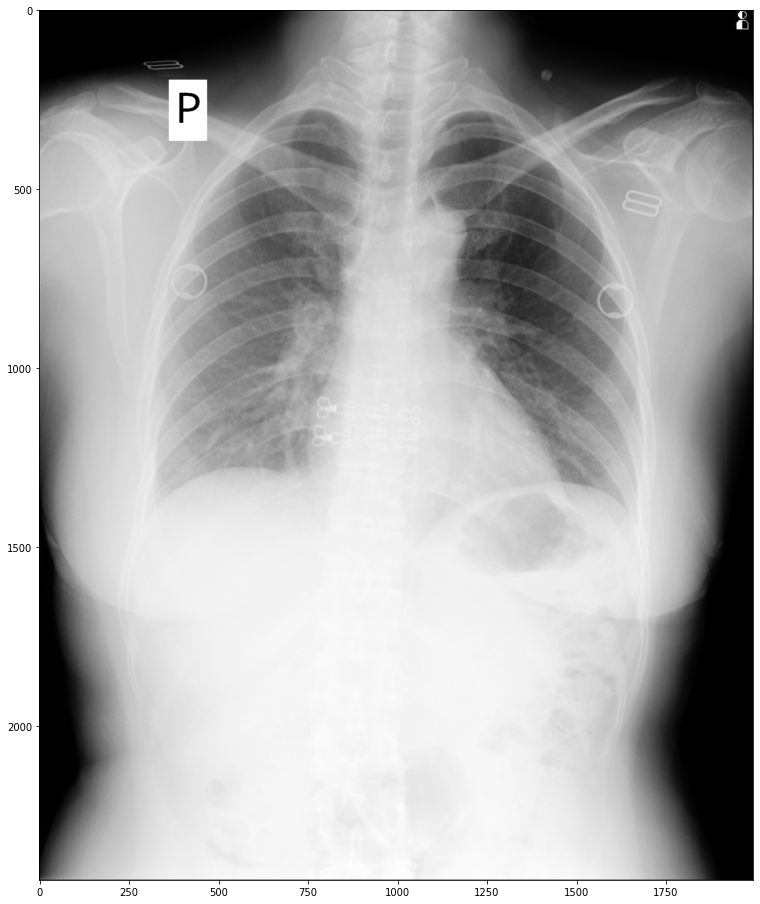

In [15]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(16, 16))
plt.imshow(arr, cmap="gray")

In [10]:
data?

Type:           FileDataset
String form:   
Dataset.file_meta -------------------------------
           (0002, 0000) File Meta Information Group Length <...>           CS: '00'
           (7fe0, 0010) Pixel Data                          OW: Array of 9690840 elements
Length:         16
File:           ~/miniconda3/envs/dkdc/lib/python3.8/site-packages/pydicom/dataset.py
Docstring:     
An extension of :class:`Dataset` to make reading and writing to
file-like easier.

Attributes
----------
preamble : str or bytes or None
    The optional DICOM preamble prepended to the :class:`FileDataset`, if
    available.
file_meta : FileMetaDataset or None
    The Dataset's file meta information as a :class:`FileMetaDataset`,
    if available (``None`` if not present).
    Consists of group ``0x0002`` elements.
filename : str or None
    The filename that the :class:`FileDataset` was read from (if read from
    file) or ``None`` if the filename is not available (if read from a
    :class:`io.BytesIO

## EDA